# Appendix B - Inflation Rate Dataset

This dataset 

In [1]:
# %pip install openpyxl

In [2]:
# https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi

In [4]:
import pandas as pd
import datetime
import pathlib

In [3]:
BASE_DIR = pathlib.Path().resolve().parent.parent
COURSES_DIR = BASE_DIR / 'course'
APPENDIX_DIR = COURSES_DIR / 'appendix'
DATASET_PATH = COURSES_DIR / 'datasets'
SOURCE_FILE = DATASET_PATH / 'appendix-b-united-states-inflation-rate.csv'

In [1]:
df = pd.read_csv(SOURCE_FILE, 
                 parse_dates=["date"],
                 usecols=[0, 1],
                 index_col=0,
                 skiprows=16
                ).rename(columns={" Inflation Rate (%)": "inflation_rate_percent"})
df.loc['1990':'2020']

NameError: name 'pd' is not defined

<AxesSubplot:xlabel='date'>

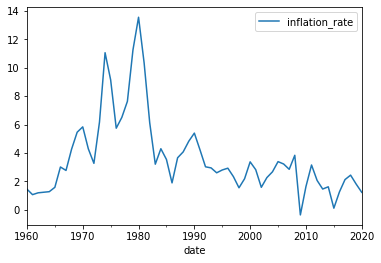

In [116]:
df.plot()

In [118]:
df = df.div(100).add(1)
df.rename(columns={' Inflation Rate (%)': 'rate'}, inplace=True)
df.loc[:'2020']

,inflation_rate
date,
1960-12-31,1.010146
1961-12-31,1.010107
1962-12-31,1.010120
1963-12-31,1.010124
1964-12-31,1.010128
...,...
2016-12-31,1.010126
2017-12-31,1.010213
2018-12-31,1.010244


In [112]:
df.head(n=10)

,inflation_rate
date,
1960-12-31,1.014580
1961-12-31,1.010707
1962-12-31,1.011988
1963-12-31,1.012397
1964-12-31,1.012789
1965-12-31,1.015852
1966-12-31,1.030151
1967-12-31,1.027728
1968-12-31,1.042718


In [98]:
from functools import reduce

In [99]:
values = df.loc[f"{df.iloc[0].name.year + 1}" : f"{df.iloc[-1].name.year}"]['inflation_rate'].values

reduce((lambda x, y: x * y), values)

-3.596299264608047e-93

In [105]:
def calculate_multiplier(row):
    values = df.loc[f"{row.name.year + 1}" : f"{df.iloc[-1].name.year + 1}"]['inflation_rate'].values
    if len(values) == 0:
        row['multiplier'] = 1
        return row
    row['multiplier']= reduce((lambda x, y: x * y), values)
    return row

df = df.apply(calculate_multiplier, axis=1)

In [106]:
# df.index.to_period()

In [107]:
# ts = df.copy()
# ts.plot()

In [108]:
df.to_pickle("inflation.pkl")

In [109]:
df.loc['1990':'2020']

,inflation_rate,multiplier
date,,
1990-12-31,0.053980,0.080479
1991-12-31,0.042350,0.055865
1992-12-31,0.030288,0.052882
1993-12-31,0.029517,0.045527
1994-12-31,0.026074,0.047647
1995-12-31,0.028054,0.048366
1996-12-31,0.029312,0.037692
1997-12-31,0.023377,0.024646
1998-12-31,0.015523,0.033995
